# 알파벳 
- source : [백준 1987](https://www.acmicpc.net/problem/1987)
- 난이도 : 골드 IV
- 분류 : 그래프 이론, 그래프 탐색, 깊이 우선 탐색, 백트래킹

## 문제
- 세로 R칸, 가로 C칸으로 된 표 모양의 보드가 있다. 보드의 각 칸에는 대문자 알파벳이 하나씩 적혀 있고, 좌측 상단 칸 (1행 1열) 에는 말이 놓여 있다.

- 말은 상하좌우로 인접한 네 칸 중의 한 칸으로 이동할 수 있는데, 새로 이동한 칸에 적혀 있는 알파벳은 지금까지 지나온 모든 칸에 적혀 있는 알파벳과는 달라야 한다. 즉, 같은 알파벳이 적힌 칸을 두 번 지날 수 없다.

- 좌측 상단에서 시작해서, 말이 최대한 몇 칸을 지날 수 있는지를 구하는 프로그램을 작성하시오. 말이 지나는 칸은 좌측 상단의 칸도 포함된다.
    
## 입력
- 첫째 줄에 R과 C가 빈칸을 사이에 두고 주어진다. (1 ≤ R,C ≤ 20) 둘째 줄부터 R개의 줄에 걸쳐서 보드에 적혀 있는 C개의 대문자 알파벳들이 빈칸 없이 주어진다.

## 출력
- 첫째 줄에 말이 지날 수 있는 최대의 칸 수를 출력한다.

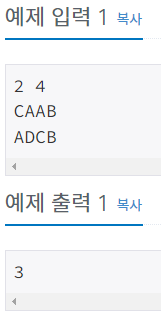

In [1]:
r, c = 2, 4
a = ["CAAB", "ADCB"]

# 출력 
# 3

- 1. 지나온 알파벳을 저장하기
- 2. 지나온 칸을 저장하기 
- 3. 움직인 칸 수를 저장하기
- 4. 칸 수 중 최대값을 출력 

In [6]:
from collections import deque

In [10]:
alpha = deque()

visited = [[0 for _ in range(c)] for _ in range(r)]

moved = []

In [ ]:
dx = [-1, 1, 0, 0] # 상, 하, 좌, 우
dy = [0, 0, -1, 1]

def in_range(x, y):
    return 0 <= x <= r-1 and 0 <= y <= c-1

alpha.append(a[0][0]) # 시작 칸의 알파벳 더하기 
visited[0][0] = 1

while:
    x, y = 0, 0
    move = 1    # 시작 칸도 지날 수 있는 칸으로 센다.
    
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        
        if in_range(nx, ny):
            if a[nx][ny] not in alpha:
                x = nx
                y = ny
                alpha.append(a[x][y])
                visited[x][y] = 1
                

- dfs로 풀기

In [18]:
r, c = 2, 4
board = ["CAAB", "ADCB"]

# 출력 
# 3

visited = [[False for _ in range(c)] for _ in range(r)]

alpha = set()
ans = 0

dx = [-1, 1, 0, 0] # 상, 하, 좌, 우
dy = [0, 0, -1, 1]

def in_range(x, y):
    return 0 <= x < r and 0 <= y < c

def dfs(x, y, move):
    global ans
    ans = max(ans, move)
    
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        
        if not in_range(nx, ny):
            continue
        
        if not visited[nx][ny] and board[nx][ny] not in alpha:
            visited[nx][ny] = True
            alpha.add(board[nx][ny])
            move += 1
            dfs(nx, ny, move)

alpha.add(board[0][0])
dfs(0, 0, 1)
print(ans)

3


In [19]:
r, c = 3, 6
board = ["HFDFFB", "AJHGDH", "DGAGEH"]

# 출력 
# 3

visited = [[False for _ in range(c)] for _ in range(r)]

alpha = set()
ans = 0

dx = [-1, 1, 0, 0] # 상, 하, 좌, 우
dy = [0, 0, -1, 1]

def in_range(x, y):
    return 0 <= x < r and 0 <= y < c

def dfs(x, y, move):
    global ans
    ans = max(ans, move)
    
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        
        if not in_range(nx, ny):
            continue
        
        if not visited[nx][ny] and board[nx][ny] not in alpha:
            visited[nx][ny] = True
            alpha.add(board[nx][ny])
            move += 1
            dfs(nx, ny, move)

alpha.add(board[0][0])
dfs(0, 0, 1)
print(ans)

6


- 최종 정리

In [ ]:
import sys

inp = sys.stdin.readline

r, c = map(int, inp().split())
board = [list(inp().rstrip()) for _ in range(r)]

visited = [[False for _ in range(c)] for _ in range(r)]

alpha = set()
ans = 0

dx = [-1, 1, 0, 0] # 상, 하, 좌, 우
dy = [0, 0, -1, 1]

def in_range(x, y):
    return 0 <= x < r and 0 <= y < c

def dfs(x, y, move):
    global ans
    ans = max(ans, move)
    alpha.add(board[x][y])
    
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        
        if not in_range(nx, ny):
            continue
        
        if not visited[nx][ny] and board[nx][ny] not in alpha:
            visited[nx][ny] = True
            move += 1
            dfs(nx, ny, move)


dfs(0, 0, 1)
print(ans)

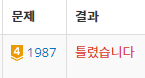

- 초기화가 안되서 틀린 것 같다
- 시간초과...

### 최종 통과 코드

In [5]:
import sys

# inp = sys.stdin.readline

# r, c = map(int, inp().split())
# board = [list(inp().rstrip()) for _ in range(r)]

r, c = 2, 4
board = ["CAAB", "ADCB"]

# 출력 
# 3

# visited = [[False for _ in range(c)] for _ in range(r)]

alpha = [False] *26
ans = 0

dx = [-1, 1, 0, 0] # 상, 하, 좌, 우
dy = [0, 0, -1, 1]

def in_range(x, y):
    return 0 <= x < r and 0 <= y < c

def dfs(x, y, move):
    global ans
    ans = max(ans, move)

    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        
        if in_range(nx, ny) and not alpha[ord(board[nx][ny])-65]:
            alpha[ord(board[nx][ny])-65] = True
            dfs(nx, ny, move+1)
            alpha[ord(board[nx][ny])-65] = False  # 백트래킹
    return True

alpha[ord(board[0][0])-65] = True # 시작지점
dfs(0, 0, 1)
print(ans)

3


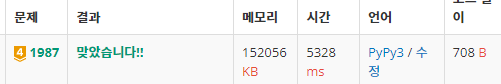

- 시간 초과 해결에 참고한 코드 [Ref](https://yerinpy73.tistory.com/48)
- 백트래킹을 이용해 계속해서 재귀하는 형식을 배웠다.
- 아직 헷갈려서 여러번 풀어봐야 할 문제...
- 재귀 메모리 떄문에 pypy3로 제출했다.